# Loading a pre-trained model

This notebook was inspired by the *rock, scissors, paper* example in Coursera's excellent
[Convolutional Neural Networks in TensorFlow](https://www.coursera.org/learn/convolutional-neural-networks-tensorflow/) course.

It uses the saved model that studens create in that course, and it makes additional use of Laurence Moroney's open source
[rock paper scissors dataset](http://www.laurencemoroney.com/rock-paper-scissors-dataset/)

The model has 12 layers and over 3.4 million parameters. It is just possible to train the model on a Jetson Nano, but it would take a very long time.

Instead, you will load a pre-trained model that has beens stored in `rps.hp5` in the data directory.

Once the model has been loaded, you can use it to identify some of the test data images as rock, paper or scissors.

First, you'll dopnwload the test data locally and unzip it.

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O rps-test-set.zip

--2019-05-16 20:08:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.208.144, 2a00:1450:4009:807::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.208.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  6.11MB/s    in 5.1s    

2019-05-16 20:08:40 (5.51 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [5]:
import zipfile

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

next, you will load the saved model and look at its structure.

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
model = tf.keras.models.load_model('data/rps.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Finally, you can load a test data image, get the model to clasify it, and display the image and its predicted class.

The model does a good job but it is not 100% accurate.

In [8]:
def get_image_file(i_type, number):
    return 'data/rps-test-set/%s/test%s01-%02d.png' % (i_type, i_type, number)

fn = get_image_file('paper', 7)
img = image.load_img(fn, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(fn)
print(classes)

data/rps-test-set/paper/testpaper01-07.png
[[1. 0. 0.]]


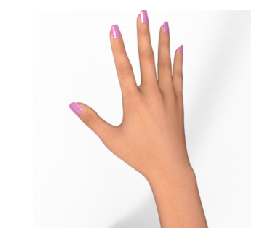

In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

test_image = matplotlib.image.imread(fn)
plt.imshow(test_image)
plt.axis('Off')
plt.show()